In [129]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
from google.colab import files
uploaded = files.upload()

Saving input.csv to input (1).csv


In [131]:
df = pd.read_csv('input.csv')
data = df.values

In [132]:
iter = np.arange(0,15,1)
for c in iter:
  data[:,c] = (data[:,c] - min(data[:,c])) /  (max(data[:,c]) - min(data[:,c]))

Identification ####################################################################################################################

In [133]:
x_id_train = data[0:9000,0:12]
y_id_train = data[0:9000,12:15]
x_id_test = data[9000:9700,0:12]
y_id_test = data[9000:9700,12:15]

In [226]:
x_id_train[:2]

array([[0.41758242, 0.51648352, 0.41758242, 0.51648352, 0.        ,
        0.        , 0.51616915, 0.        , 0.43126264, 0.5199005 ,
        0.01769253, 0.43137153],
       [0.42857143, 0.52747253, 0.41758242, 0.51648352, 0.88195991,
        0.9       , 0.5199005 , 0.01769253, 0.43137153, 0.52487562,
        0.04332602, 0.43188484]])

In [134]:
y_id_train[:2]

array([[0.52487562, 0.04332602, 0.43188484],
       [0.53109453, 0.07669282, 0.43315072]])

In [135]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(3, activation= tf.keras.activations.linear)
    ])
model.compile(optimizer= tf.keras.optimizers.Adam(lr =0.001),loss='mean_squared_error',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [136]:
r = model.fit(x_id_train, y_id_train, epochs= 1000)

Epoch 1/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9534
Epoch 2/1000
282/282 [==============================] - 1s 2ms/step - loss: 1.2731e-04 - accuracy: 0.9887
Epoch 3/1000
282/282 [==============================] - 1s 2ms/step - loss: 1.1198e-04 - accuracy: 0.9911
Epoch 4/1000
282/282 [==============================] - 1s 2ms/step - loss: 1.0786e-04 - accuracy: 0.9928
Epoch 5/1000
282/282 [==============================] - 1s 2ms/step - loss: 1.2305e-04 - accuracy: 0.9912
Epoch 6/1000
282/282 [==============================] - 1s 2ms/step - loss: 1.1277e-04 - accuracy: 0.9917
Epoch 7/1000
282/282 [==============================] - 1s 2ms/step - loss: 1.0632e-04 - accuracy: 0.9928
Epoch 8/1000
282/282 [==============================] - 1s 2ms/step - loss: 1.1271e-04 - accuracy: 0.9923
Epoch 9/1000
282/282 [==============================] - 1s 2ms/step - loss: 1.1012e-04 - accuracy: 0.9928
Epoch 10/1000
282/282 [===========================

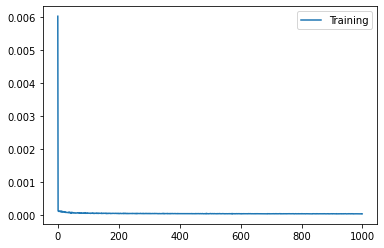

In [137]:
plt.plot(r.history['loss'],label = 'Training')
plt.legend()
plt.show()

In [138]:
y_id_pred = model.predict(x_id_test)

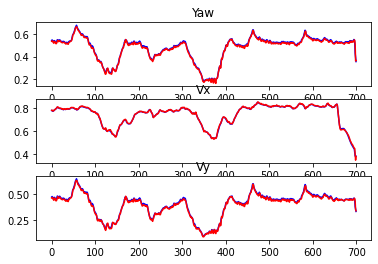

In [139]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311).set_title("Yaw")
plt.plot(x_label, y_id_test[:,0], '-b', x_label, y_id_pred[:,0], '-r')
plt.subplot(312).set_title("Vx")
plt.plot(x_label, y_id_test[:,1], '-b', x_label, y_id_pred[:,1], '-r')
plt.subplot(313).set_title("Vy")
plt.plot(x_label, y_id_test[:,2], '-b', x_label, y_id_pred[:,2], '-r')
plt.show()

In [140]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 128)               1664      
                                                                 
 dense_63 (Dense)            (None, 128)               16512     
                                                                 
 dense_64 (Dense)            (None, 128)               16512     
                                                                 
 dense_65 (Dense)            (None, 128)               16512     
                                                                 
 dense_66 (Dense)            (None, 128)               16512     
                                                                 
 dense_67 (Dense)            (None, 3)                 387       
                                                                 
Total params: 68,099
Trainable params: 68,099
Non-tra

In [141]:
model.save('id/my_model') 

INFO:tensorflow:Assets written to: id/my_model/assets


Inverse #########################################################################################################################

In [142]:
x_inv_train = data[0:9000,2:15]
y_inv_train = data[0:9000,0:2]
x_inv_test = data[9000:9700,2:15]
y_inv_test = data[9000:9700,0:2]

In [143]:
x_inv_train[:2]

array([[0.41758242, 0.51648352, 0.        , 0.        , 0.51616915,
        0.        , 0.43126264, 0.5199005 , 0.01769253, 0.43137153,
        0.52487562, 0.04332602, 0.43188484],
       [0.41758242, 0.51648352, 0.88195991, 0.9       , 0.5199005 ,
        0.01769253, 0.43137153, 0.52487562, 0.04332602, 0.43188484,
        0.53109453, 0.07669282, 0.43315072]])

In [227]:
y_inv_train[:2]

array([[0.41758242, 0.51648352],
       [0.42857143, 0.52747253]])

In [144]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(2, activation= tf.keras.activations.linear)
    ])
model.compile(optimizer= tf.keras.optimizers.Adam(lr =0.001),loss='mean_squared_error',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [145]:
r = model.fit(x_inv_train, y_inv_train, epochs= 1000)

Epoch 1/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 0.9659
Epoch 2/1000
282/282 [==============================] - 1s 2ms/step - loss: 4.4911e-04 - accuracy: 0.9821
Epoch 3/1000
282/282 [==============================] - 1s 2ms/step - loss: 3.7365e-04 - accuracy: 0.9829
Epoch 4/1000
282/282 [==============================] - 1s 2ms/step - loss: 4.2665e-04 - accuracy: 0.9792
Epoch 5/1000
282/282 [==============================] - 1s 2ms/step - loss: 3.9891e-04 - accuracy: 0.9813
Epoch 6/1000
282/282 [==============================] - 1s 2ms/step - loss: 3.8479e-04 - accuracy: 0.9797
Epoch 7/1000
282/282 [==============================] - 1s 2ms/step - loss: 3.5966e-04 - accuracy: 0.9820
Epoch 8/1000
282/282 [==============================] - 1s 2ms/step - loss: 3.3509e-04 - accuracy: 0.9823
Epoch 9/1000
282/282 [==============================] - 1s 2ms/step - loss: 3.7220e-04 - accuracy: 0.9811
Epoch 10/1000
282/282 [===========================

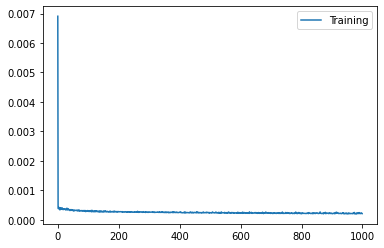

In [146]:
plt.plot(r.history['loss'],label = 'Training')
plt.legend()
plt.show()

In [147]:
y_inv_pred = model.predict(x_inv_test)

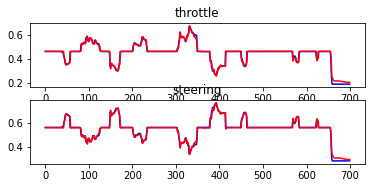

In [148]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311).set_title("throttle")
plt.plot(x_label, y_inv_test[:,0], '-b', x_label, y_inv_pred[:,0], '-r')
plt.subplot(312).set_title("steering")
plt.plot(x_label, y_inv_test[:,1], '-b', x_label, y_inv_pred[:,1], '-r')
plt.show()

In [149]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 128)               1792      
                                                                 
 dense_69 (Dense)            (None, 128)               16512     
                                                                 
 dense_70 (Dense)            (None, 128)               16512     
                                                                 
 dense_71 (Dense)            (None, 128)               16512     
                                                                 
 dense_72 (Dense)            (None, 128)               16512     
                                                                 
 dense_73 (Dense)            (None, 2)                 258       
                                                                 
Total params: 68,098
Trainable params: 68,098
Non-tra

In [150]:
model.save('inv/my_model') 

INFO:tensorflow:Assets written to: inv/my_model/assets


Running ###########################################################################################################################

In [176]:
model_inverse = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(2, activation= tf.keras.activations.linear)
    ])
model_inverse.compile(optimizer= tf.keras.optimizers.Adam(lr =0.001),loss='mean_squared_error',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [177]:
model_inverse = tf.keras.models.load_model('inv/my_model')

In [178]:
model_inverse.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 128)               1792      
                                                                 
 dense_69 (Dense)            (None, 128)               16512     
                                                                 
 dense_70 (Dense)            (None, 128)               16512     
                                                                 
 dense_71 (Dense)            (None, 128)               16512     
                                                                 
 dense_72 (Dense)            (None, 128)               16512     
                                                                 
 dense_73 (Dense)            (None, 2)                 258       
                                                                 
Total params: 68,098
Trainable params: 68,098
Non-tra

In [179]:
model_identification = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(3, activation= tf.keras.activations.linear)
    ])
model_identification.compile(optimizer= tf.keras.optimizers.Adam(lr =0.001),loss='mean_squared_error',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [180]:
model_identification = tf.keras.models.load_model('id/my_model')

In [181]:
model_identification.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 128)               1664      
                                                                 
 dense_63 (Dense)            (None, 128)               16512     
                                                                 
 dense_64 (Dense)            (None, 128)               16512     
                                                                 
 dense_65 (Dense)            (None, 128)               16512     
                                                                 
 dense_66 (Dense)            (None, 128)               16512     
                                                                 
 dense_67 (Dense)            (None, 3)                 387       
                                                                 
Total params: 68,099
Trainable params: 68,099
Non-tra

In [185]:
row = np.arange(0,9000,1)

In [186]:
row.shape

(700,)

In [245]:
inv_input=np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],dtype=float);
id_input=np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],dtype=float);

In [246]:
inv_pred = np.zeros([700, 2],dtype=float)
inv_output_11 = data[9000,2]
inv_output_12 = data[9000,3]
inv_output_21 = data[9000,4]
inv_output_22 = data[9000,5]

id_pred = np.zeros([700, 3],dtype=float)
id_output_11 = data[9000,9]
id_output_12 = data[9000,10]
id_output_13 = data[9000,11]
id_output_21 = data[9000,6]
id_output_22 = data[9000,7]
id_output_23 = data[9000,8]

inv_pred_11 = data[9000,2]
inv_pred_12 = data[9000,3]

inv_pred_21 = data[9000,4]
inv_pred_22 = data[9000,5]

In [247]:
  for i in row:
    inv_input[0,0] = inv_output_11
    inv_input[0,1] = inv_output_12
    inv_input[0,2] = inv_output_21
    inv_input[0,3] = inv_output_22
    inv_input[0,4] = data[i+9000,6]
    inv_input[0,5] = data[i+9000,7]
    inv_input[0,6] = data[i+9000,8]
    inv_input[0,7] = data[i+9000,9]
    inv_input[0,8] = data[i+9000,10]    
    inv_input[0,9] = data[i+9000,11]
    inv_input[0,10] = data[i+9000,12]
    inv_input[0,11] = data[i+9000,13]
    inv_input[0,12] = data[i+9000,14]

    inv_pred[i] = model_inverse.predict(inv_input)
    
    print(inv_input)
    inv_output_21 = inv_output_11
    inv_output_22 = inv_output_12
    inv_output_11 = inv_pred[i,0]
    inv_output_12 = inv_pred[i,1]

    id_input[0,0] = inv_pred[i,0]
    id_input[0,1] = inv_pred[i,1]
    id_input[0,2] = inv_pred_11
    id_input[0,3] = inv_pred_12
    id_input[0,4] = inv_pred_21
    id_input[0,5] = inv_pred_22
    id_input[0,6] = id_output_21
    id_input[0,7] = id_output_22
    id_input[0,8] = id_output_23  
    id_input[0,9] = id_output_11
    id_input[0,10] = id_output_12
    id_input[0,11] = id_output_13

    id_pred[i] = model_identification.predict(id_input)
    
    inv_pred_21 = inv_pred_11
    inv_pred_22 = inv_pred_12
    inv_pred_11 = inv_pred[i,0]
    inv_pred_12 = inv_pred[i,1]
    
    id_output_21 = id_output_11
    id_output_22 = id_output_12
    id_output_23 = id_output_13
    id_output_11= id_pred[i,0]
    id_output_12 = id_pred[i,1]
    id_output_13 = id_pred[i,2]
    print(id_input)

[[0.46153846 0.56043956 0.8908686  0.90909091 0.54975124 0.77923303
  0.47442643 0.54726368 0.78008154 0.47127259 0.5460199  0.78152047
  0.46974302]]
[[0.46289909 0.5571444  0.46153846 0.56043956 0.8908686  0.90909091
  0.54975124 0.77923303 0.47442643 0.54726368 0.78008154 0.47127259]]
[[0.46289909 0.5571444  0.46153846 0.56043956 0.54726368 0.78008154
  0.47127259 0.5460199  0.78152047 0.46974302 0.54975124 0.77972122
  0.47445347]]
[[0.54872108 0.64103317 0.46289909 0.5571444  0.46153846 0.56043956
  0.54726368 0.78008154 0.47127259 0.53730369 0.78293693 0.45999148]]
[[0.54872108 0.64103317 0.46289909 0.5571444  0.5460199  0.78152047
  0.46974302 0.54975124 0.77972122 0.47445347 0.5460199  0.77568889
  0.46945589]]
[[0.57641494 0.66761136 0.54872108 0.64103317 0.46289909 0.5571444
  0.53730369 0.78293693 0.45999148 0.55818212 0.96505952 0.50841099]]
[[0.57641494 0.66761136 0.54872108 0.64103317 0.54975124 0.77972122
  0.47445347 0.5460199  0.77568889 0.46945589 0.53731343 0.7755399

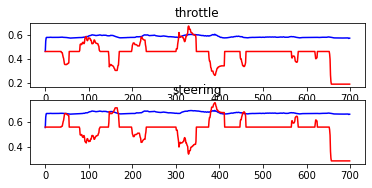

In [248]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311).set_title("throttle")
plt.plot(x_label, inv_pred[:,0], '-b', x_label, data[9002:9702,0], '-r')
plt.subplot(312).set_title("steering")
plt.plot(x_label, inv_pred[:,1], '-b', x_label, data[9002:9702,1], '-r')
plt.show()

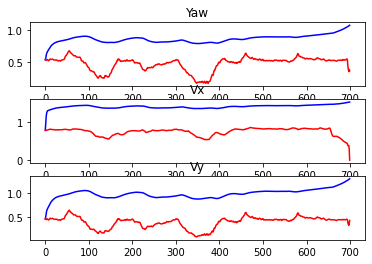

In [249]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311).set_title("Yaw")
plt.plot(x_label, id_pred[:,0], '-b', x_label, data[9002:9702,12], '-r')
plt.subplot(312).set_title("Vx")
plt.plot(x_label, id_pred[:,1], '-b', x_label, data[9002:9702,13], '-r')
plt.subplot(313).set_title("Vy")
plt.plot(x_label, id_pred[:,2], '-b', x_label, data[9002:9702,14], '-r')
plt.show()

In [250]:
err = np.arange(0,700,1)
error = np.zeros([700, 5],dtype=float)
for k in err:
    error[k,0] = abs(data[k+9000,0]-inv_pred[k,0])
    error[k,1] = abs(data[k+9000,1]-inv_pred[k,1])
    error[k,2] = abs(data[k+9000,12]-id_pred[k,0])
    error[k,3] = abs(data[k+9000,13]-id_pred[k,1])
    error[k,4] = abs(data[k+9000,14]-id_pred[k,2])

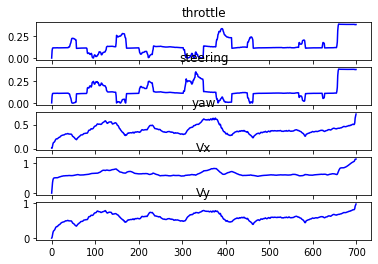

In [251]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(511).set_title("throttle")
plt.plot(x_label, error[:,0], '-b')
plt.subplot(512).set_title("steering")
plt.plot(x_label, error[:,1], '-b')
plt.subplot(513).set_title("yaw")
plt.plot(x_label, error[:,2], '-b')
plt.subplot(514).set_title("Vx")
plt.plot(x_label, error[:,3], '-b')
plt.subplot(515).set_title("Vy")
plt.plot(x_label, error[:,4], '-b')
plt.show()

In [254]:
linear = np.linspace(error[0,:], error[699,:])

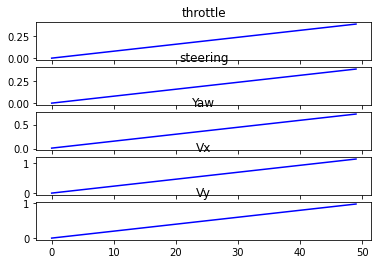

In [255]:
x_label = np.arange(0,50,1)
plt.figure()
plt.subplot(511).set_title("throttle")
plt.plot(x_label, linear[:,0], '-b')
plt.subplot(512).set_title("steering")
plt.plot(x_label, linear[:,1], '-b')
plt.subplot(513).set_title("Yaw")
plt.plot(x_label, linear[:,2], '-b')
plt.subplot(514).set_title("Vx")
plt.plot(x_label, linear[:,3], '-b')
plt.subplot(515).set_title("Vy")
plt.plot(x_label, linear[:,4], '-b')
plt.show()

In [256]:
inv_input=np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],dtype=float);
id_input=np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],dtype=float);

In [ ]:
inv_pred = np.zeros([700, 2],dtype=float)
inv_output_11 = 0.0
inv_output_12 = 0.0
inv_output_21 = 0.0
inv_output_22 = 0.0

id_pred = np.zeros([700, 3],dtype=float)
id_output_11 = 0.0
id_output_12 = 0.0
id_output_13 = 0.0
id_output_21 = 0.0
id_output_22 = 0.0
id_output_23 = 0.0

inv_pred_11 = 0.0
inv_pred_12 = 0.0

inv_pred_21 = 0.0
inv_pred_22 = 0.0

In [257]:
 for i in row:
    inv_input[0,0] = inv_output_11
    inv_input[0,1] = inv_output_12
    inv_input[0,2] = inv_output_21
    inv_input[0,3] = inv_output_22
    inv_input[0,4] = data[i+9000,6]
    inv_input[0,5] = data[i+9000,7]
    inv_input[0,6] = data[i+9000,8]
    inv_input[0,7] = data[i+9000,9]
    inv_input[0,8] = data[i+9000,10]    
    inv_input[0,9] = data[i+9000,11]
    inv_input[0,10] = data[i+9000,12]
    inv_input[0,11] = data[i+9000,13]
    inv_input[0,12] = data[i+9000,14]

    inv_pred[i] = model_inverse.predict(inv_input)
    
    print(inv_input)
    inv_output_21 = inv_output_11
    inv_output_22 = inv_output_12
    inv_output_11 = inv_pred[i,0]
    inv_output_12 = inv_pred[i,1]

    id_input[0,0] = inv_pred[i,0]
    id_input[0,1] = inv_pred[i,1]
    id_input[0,2] = inv_pred_11
    id_input[0,3] = inv_pred_12
    id_input[0,4] = inv_pred_21
    id_input[0,5] = inv_pred_22
    id_input[0,6] = id_output_21
    id_input[0,7] = id_output_22
    id_input[0,8] = id_output_23  
    id_input[0,9] = id_output_11
    id_input[0,10] = id_output_12
    id_input[0,11] = id_output_13

    id_pred[i] = model_identification.predict(id_input)
    
    inv_pred_21 = inv_pred_11
    inv_pred_22 = inv_pred_12
    inv_pred_11 = inv_pred[i,0]
    inv_pred_12 = inv_pred[i,1]
    
    id_output_21 = id_output_11
    id_output_22 = id_output_12
    id_output_23 = id_output_13
    id_output_11= id_pred[i,0]
    id_output_12 = id_pred[i,1]
    id_output_13 = id_pred[i,2]
    print(id_input)

[[0.57362956 0.66500545 0.57361221 0.66498923 0.54975124 0.77923303
  0.47442643 0.54726368 0.78008154 0.47127259 0.5460199  0.78152047
  0.46974302]]
[[0.57798177 0.66907728 0.57362956 0.66500545 0.57361221 0.66498923
  1.07121778 1.51529598 1.28905702 1.07645226 1.51917636 1.29647613]]
[[0.57798177 0.66907728 0.57362956 0.66500545 0.54726368 0.78008154
  0.47127259 0.5460199  0.78152047 0.46974302 0.54975124 0.77972122
  0.47445347]]
[[0.57931989 0.67032921 0.57798177 0.66907728 0.57362956 0.66500545
  1.07645226 1.51917636 1.29647613 1.08137631 1.52303791 1.30346441]]
[[0.57931989 0.67032921 0.57798177 0.66907728 0.5460199  0.78152047
  0.46974302 0.54975124 0.77972122 0.47445347 0.5460199  0.77568889
  0.46945589]]
[[0.57935697 0.6703639  0.57931989 0.67032921 0.57798177 0.66907728
  1.08137631 1.52303791 1.30346441 1.08608675 1.52702534 1.31016004]]
[[0.57935697 0.6703639  0.57931989 0.67032921 0.54975124 0.77972122
  0.47445347 0.5460199  0.77568889 0.46945589 0.53731343 0.775539

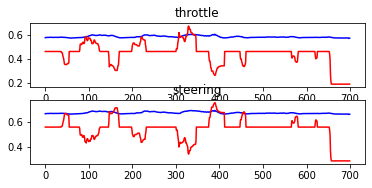

In [258]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311).set_title("throttle")
plt.plot(x_label, inv_pred[:,0], '-b', x_label, data[9002:9702,0], '-r')
plt.subplot(312).set_title("steering")
plt.plot(x_label, inv_pred[:,1], '-b', x_label, data[9002:9702,1], '-r')
plt.show()

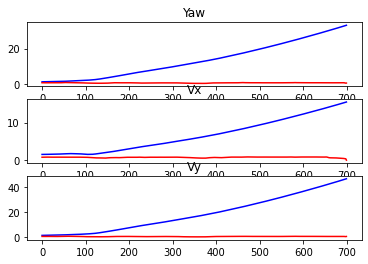

In [259]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311).set_title("Yaw")
plt.plot(x_label, id_pred[:,0], '-b', x_label, data[9002:9702,12], '-r')
plt.subplot(312).set_title("Vx")
plt.plot(x_label, id_pred[:,1], '-b', x_label, data[9002:9702,13], '-r')
plt.subplot(313).set_title("Vy")
plt.plot(x_label, id_pred[:,2], '-b', x_label, data[9002:9702,14], '-r')
plt.show()

In [228]:
inv_input=np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],dtype=float);
id_input=np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],dtype=float);
i = 0
for i in row:
    inv_input[0,0] = data[i+9000,2]
    inv_input[0,1] = data[i+9000,3]
    inv_input[0,2] = data[i+9000,4]
    inv_input[0,3] = data[i+9000,5]
    inv_input[0,4] = data[i+9000,6]
    inv_input[0,5] = data[i+9000,7]
    inv_input[0,6] = data[i+9000,8]
    inv_input[0,7] = data[i+9000,9]
    inv_input[0,8] = data[i+9000,10]    
    inv_input[0,9] = data[i+9000,11]
    inv_input[0,10] = data[i+9000,12]
    inv_input[0,11] = data[i+9000,13]
    inv_input[0,12] = data[i+9000,14]

    inv_pred[i] = model_inverse.predict(inv_input)
    
    print(inv_input)

    id_input[0,0] = data[i+9000,0]
    id_input[0,1] = data[i+9000,1]
    id_input[0,2] = data[i+9000,2]
    id_input[0,3] = data[i+9000,3]
    id_input[0,4] = data[i+9000,4]
    id_input[0,5] = data[i+9000,5]
    id_input[0,6] = data[i+9000,6]
    id_input[0,7] = data[i+9000,7]
    id_input[0,8] = data[i+9000,8]  
    id_input[0,9] = data[i+9000,9]
    id_input[0,10] = data[i+9000,10]
    id_input[0,11] = data[i+9000,11]

    id_pred[i] = model_identification.predict(id_input)
    
    inv_pred_21 = inv_pred_11
    inv_pred_22 = inv_pred_12
    inv_pred_11 = inv_pred[i,0]
    inv_pred_12 = inv_pred[i,1]
    
    id_output_21 = id_output_11
    id_output_22 = id_output_12
    id_output_23 = id_output_13
    id_output_11= id_pred[i,0]
    id_output_12 = id_pred[i,1]
    id_output_13 = id_pred[i,2]
    print(id_input)

[[0.46153846 0.56043956 0.8908686  0.90909091 0.54975124 0.77923303
  0.47442643 0.54726368 0.78008154 0.47127259 0.5460199  0.78152047
  0.46974302]]
[[0.46153846 0.56043956 0.46153846 0.56043956 0.8908686  0.90909091
  0.54975124 0.77923303 0.47442643 0.54726368 0.78008154 0.47127259]]
[[0.46153846 0.56043956 0.8908686  0.90909091 0.54726368 0.78008154
  0.47127259 0.5460199  0.78152047 0.46974302 0.54975124 0.77972122
  0.47445347]]
[[0.46153846 0.56043956 0.46153846 0.56043956 0.8908686  0.90909091
  0.54726368 0.78008154 0.47127259 0.5460199  0.78152047 0.46974302]]
[[0.46153846 0.56043956 0.8908686  0.90909091 0.5460199  0.78152047
  0.46974302 0.54975124 0.77972122 0.47445347 0.5460199  0.77568889
  0.46945589]]
[[0.46153846 0.56043956 0.46153846 0.56043956 0.8908686  0.90909091
  0.5460199  0.78152047 0.46974302 0.54975124 0.77972122 0.47445347]]
[[0.46153846 0.56043956 0.8908686  0.90909091 0.54975124 0.77972122
  0.47445347 0.5460199  0.77568889 0.46945589 0.53731343 0.775539

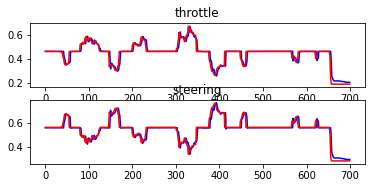

In [229]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311).set_title("throttle")
plt.plot(x_label, inv_pred[:,0], '-b', x_label, data[9002:9702,0], '-r')
plt.subplot(312).set_title("steering")
plt.plot(x_label, inv_pred[:,1], '-b', x_label, data[9002:9702,1], '-r')
plt.show()

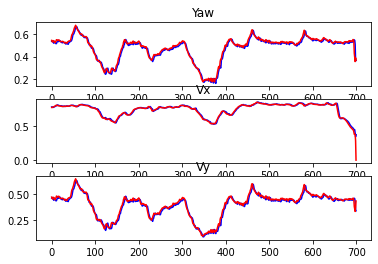

In [230]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311).set_title("Yaw")
plt.plot(x_label, id_pred[:,0], '-b', x_label, data[9002:9702,12], '-r')
plt.subplot(312).set_title("Vx")
plt.plot(x_label, id_pred[:,1], '-b', x_label, data[9002:9702,13], '-r')
plt.subplot(313).set_title("Vy")
plt.plot(x_label, id_pred[:,2], '-b', x_label, data[9002:9702,14], '-r')
plt.show()

In [232]:
inv_pred = np.zeros([700, 2],dtype=float)
inv_output_11 = data[9000,2]
inv_output_12 = data[9000,3]
inv_output_21 = data[9000,4]
inv_output_22 = data[9000,5]

id_pred = np.zeros([700, 3],dtype=float)
id_output_11 = data[9000,9]
id_output_12 = data[9000,10]
id_output_13 = data[9000,11]
id_output_21 = data[9000,6]
id_output_22 = data[9000,7]
id_output_23 = data[9000,8]

inv_pred_11 = data[9000,2]
inv_pred_12 = data[9000,3]

inv_pred_21 = data[9000,4]
inv_pred_22 = data[9000,5]

In [233]:
inv_input=np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],dtype=float);
id_input=np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],dtype=float);
i = 0
for i in row:
    inv_input[0,0] = inv_output_11
    inv_input[0,1] = inv_output_12
    inv_input[0,2] = data[i+9000,4]
    inv_input[0,3] = data[i+9000,5]
    inv_input[0,4] = data[i+9000,6]
    inv_input[0,5] = data[i+9000,7]
    inv_input[0,6] = data[i+9000,8]
    inv_input[0,7] = data[i+9000,9]
    inv_input[0,8] = data[i+9000,10]    
    inv_input[0,9] = data[i+9000,11]
    inv_input[0,10] = data[i+9000,12]
    inv_input[0,11] = data[i+9000,13]
    inv_input[0,12] = data[i+9000,14]

    inv_pred[i] = model_inverse.predict(inv_input)
    
    print(inv_input)
    inv_output_21 = inv_output_11
    inv_output_22 = inv_output_12
    inv_output_11 = inv_pred[i,0]
    inv_output_12 = inv_pred[i,1]

    id_input[0,0] = inv_pred[i,0]
    id_input[0,1] = inv_pred[i,1]
    id_input[0,2] = inv_pred_11
    id_input[0,3] = inv_pred_12
    id_input[0,4] = inv_pred_21
    id_input[0,5] = inv_pred_22
    id_input[0,6] = id_output_21
    id_input[0,7] = id_output_22
    id_input[0,8] = id_output_23  
    id_input[0,9] = id_output_11
    id_input[0,10] = id_output_12
    id_input[0,11] = id_output_13

    id_pred[i] = model_identification.predict(id_input)
    
    inv_pred_21 = inv_pred_11
    inv_pred_22 = inv_pred_12
    inv_pred_11 = inv_pred[i,0]
    inv_pred_12 = inv_pred[i,1]
    
    id_output_21 = id_output_11
    id_output_22 = id_output_12
    id_output_23 = id_output_13
    id_output_11= id_pred[i,0]
    id_output_12 = id_pred[i,1]
    id_output_13 = id_pred[i,2]
    print(id_input)

[[0.46153846 0.56043956 0.8908686  0.90909091 0.54975124 0.77923303
  0.47442643 0.54726368 0.78008154 0.47127259 0.5460199  0.78152047
  0.46974302]]
[[0.46289909 0.5571444  0.46153846 0.56043956 0.8908686  0.90909091
  0.54975124 0.77923303 0.47442643 0.54726368 0.78008154 0.47127259]]
[[0.46289909 0.5571444  0.8908686  0.90909091 0.54726368 0.78008154
  0.47127259 0.5460199  0.78152047 0.46974302 0.54975124 0.77972122
  0.47445347]]
[[0.46165925 0.55593252 0.46289909 0.5571444  0.46153846 0.56043956
  0.54726368 0.78008154 0.47127259 0.53730369 0.78293693 0.45999148]]
[[0.46165925 0.55593252 0.8908686  0.90909091 0.5460199  0.78152047
  0.46974302 0.54975124 0.77972122 0.47445347 0.5460199  0.77568889
  0.46945589]]
[[0.46013886 0.55444634 0.46165925 0.55593252 0.46289909 0.5571444
  0.53730369 0.78293693 0.45999148 0.55736887 0.95193887 0.50576115]]
[[0.46013886 0.55444634 0.8908686  0.90909091 0.54975124 0.77972122
  0.47445347 0.5460199  0.77568889 0.46945589 0.53731343 0.7755399

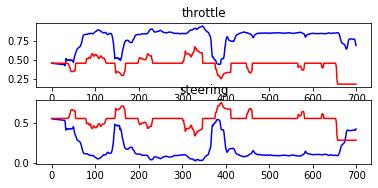

In [234]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311).set_title("throttle")
plt.plot(x_label, inv_pred[:,0], '-b', x_label, data[9002:9702,0], '-r')
plt.subplot(312).set_title("steering")
plt.plot(x_label, inv_pred[:,1], '-b', x_label, data[9002:9702,1], '-r')
plt.show()

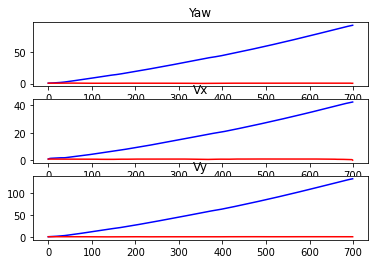

In [235]:
x_label = np.arange(0,700,1)
plt.figure()
plt.subplot(311).set_title("Yaw")
plt.plot(x_label, id_pred[:,0], '-b', x_label, data[9002:9702,12], '-r')
plt.subplot(312).set_title("Vx")
plt.plot(x_label, id_pred[:,1], '-b', x_label, data[9002:9702,13], '-r')
plt.subplot(313).set_title("Vy")
plt.plot(x_label, id_pred[:,2], '-b', x_label, data[9002:9702,14], '-r')
plt.show()